In [ ]:
import requests

game_list=('Melate','Revancha','Revanchita','Melate-Retro','Tris','Chispazo',)

def download_csv(game_name:str):
    url= f"https://www.pronosticos.gob.mx/Documentos/Historicos/{game_name}.csv"
    response = requests.get(url,verify=False)
    with open(f"games_csv/{game_name}.csv", "wb") as file:
        file.write(response.content)

# (download_csv(game) for game in game_list)
for game in game_list:
    download_csv(game)
    print(game)




In [21]:
import pandas as pd

data=pd.read_csv(f"games_csv/Chispazo.csv")
data.head()
data[['Día', 'Mes', 'Año']] = data['FECHA'].str.split('/', expand=True)

# Eliminar la columna 'FECHA' original
data.drop('FECHA', axis=1, inplace=True)

# Mostrar los primeros 5 registros
# print(data.head())
# Calcular la frecuencia de cada número ganador
num_frequencies = data.iloc[:, 1:6].stack().value_counts()

# Mostrar las frecuencias de los números ganadores
print(f"numero de frecuencias {num_frequencies}\n")
# Realizar un análisis estadístico de los datos
stats = data.iloc[:, 1:6].describe()

# Mostrar el análisis estadístico
print(f"analisis estadistico {stats}\n")
# Crear tablas de frecuencia para cada posición
freq_tables = []
for i in range(5):
    freq_table = pd.crosstab(index=data.iloc[:, i+1], columns=i+1)
    freq_tables.append(freq_table)

# Mostrar las tablas de frecuencia
for i, freq_table in enumerate(freq_tables):
    print(f'Tabla de frecuencia para posición {i+1}:')
    print(freq_table)
    print()
    
# Calcular el coeficiente de correlación
corr_coef = data.iloc[:, 1:6].corr()

# Mostrar la matriz de correlación
print('Matriz de correlación:')
print(corr_coef)

numero de frecuencias 10    1843
21    1809
17    1795
25    1793
18    1792
24    1776
12    1768
23    1758
8     1758
9     1757
4     1755
19    1749
14    1747
11    1746
2     1745
1     1744
7     1742
20    1739
6     1733
16    1733
15    1731
5     1726
13    1721
22    1710
3     1691
27    1559
26    1468
28    1452
dtype: int64

analisis estadistico                 R1           R2           R3           R4           R5
count  9668.000000  9668.000000  9668.000000  9668.000000  9668.000000
mean      4.805234     9.589057    14.332747    19.096607    23.855399
std       3.601206     4.540228     4.818035     4.576621     3.659726
min       1.000000     2.000000     3.000000     4.000000     6.000000
25%       2.000000     6.000000    11.000000    16.000000    22.000000
50%       4.000000     9.000000    14.000000    20.000000    25.000000
75%       7.000000    13.000000    18.000000    23.000000    27.000000
max      21.000000    25.000000    26.000000    27.000000    28.000

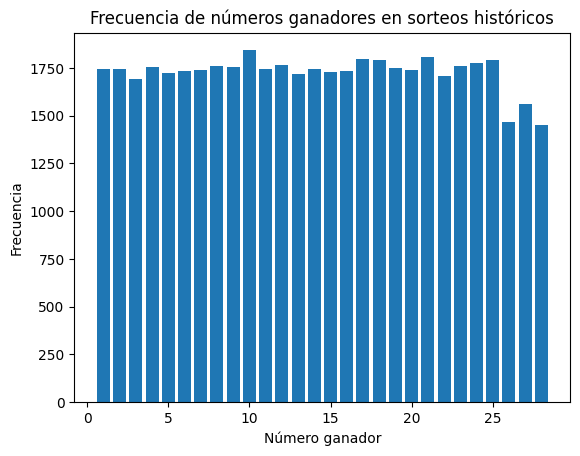

In [3]:
import matplotlib.pyplot as plt

# Calcular la frecuencia de cada número ganador
num_frequencies = data.iloc[:, 1:6].stack().value_counts()

# Crear un gráfico de barras para mostrar la frecuencia de cada número ganador
plt.bar(num_frequencies.index, num_frequencies.values)
plt.xlabel('Número ganador')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de números ganadores en sorteos históricos')
plt.show()


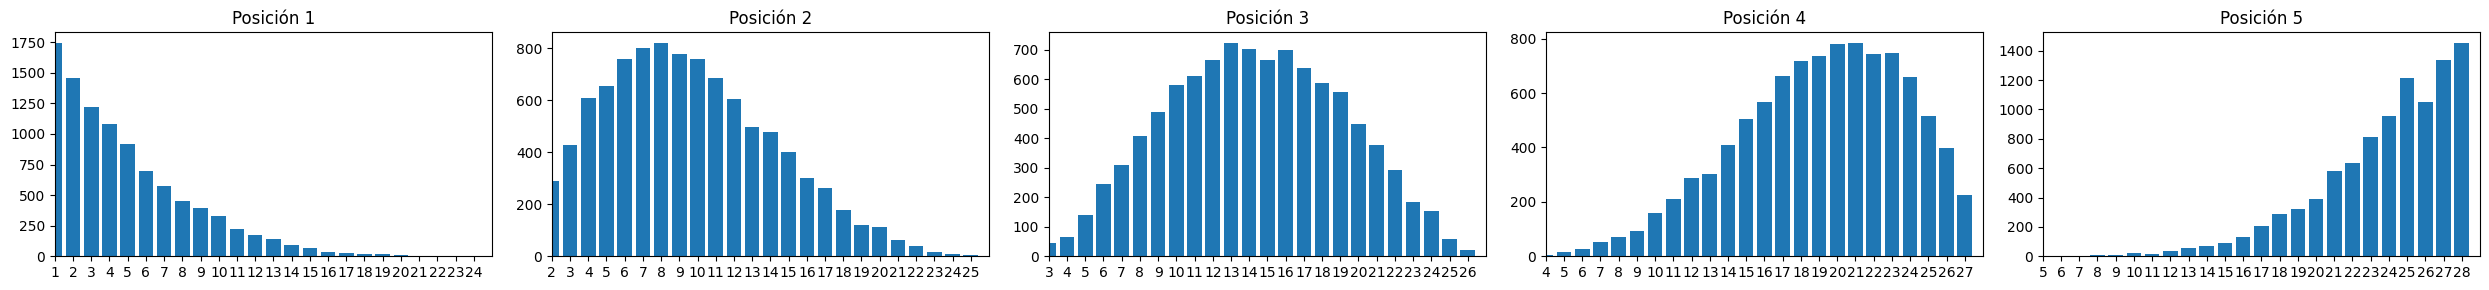

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Cargar los datos del archivo CSV
data = pd.read_csv('games_csv/Chispazo.csv')

# Crear una tabla de frecuencias para cada posición
freq_pos1 = data['R1'].value_counts().sort_index()
freq_pos2 = data['R2'].value_counts().sort_index()
freq_pos3 = data['R3'].value_counts().sort_index()
freq_pos4 = data['R4'].value_counts().sort_index()
freq_pos5 = data['R5'].value_counts().sort_index()

# Crear la figura y los subplots
# fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(15, 3))

# Crear cada tabla de frecuencias como un gráfico de barras
# axs[0].bar(freq_pos1.index, freq_pos1.values)
# axs[0].set_title('Posición 1')
# axs[1].bar(freq_pos2.index, freq_pos2.values)
# axs[1].set_title('Posición 2')
# axs[2].bar(freq_pos3.index, freq_pos3.values)
# axs[2].set_title('Posición 3')
# axs[3].bar(freq_pos4.index, freq_pos4.values)
# axs[3].set_title('Posición 4')
# axs[4].bar(freq_pos5.index, freq_pos5.values)
# axs[4].set_title('Posición 5')
##########
pos_ranges = [(1, 25), (2, 26), (3, 27), (4, 28), (5, 29)]

# Crear una tabla de frecuencias para cada posición
freq_pos = [data[f'R{i}'].value_counts().sort_index() for i in range(1, 6)]


# Crear la figura y los subplots
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(25, 3))

# Crear cada tabla de frecuencias como un gráfico de barras y ajustar los límites del eje x
for i in range(5):
    axs[i].bar(freq_pos[i].index, freq_pos[i].values)
    axs[i].set_title(f'Posición {i+1}')
    axs[i].set_xlim(pos_ranges[i])
    axs[i].set_xticks(range(*pos_ranges[i]))
    axs[i].set_xticklabels(range(*pos_ranges[i]))







# Ajustar la posición de los subplots y mostrar la figura
plt.tight_layout()
plt.show()

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos del archivo CSV
data = pd.read_csv('games_csv/Chispazo.csv')

# Crear una tabla cruzada de frecuencias conjuntas para cada combinación de números en cada posición
crosstab = pd.crosstab([data["R1"], data["R2"], data['R3'], data['R4']], data['R5'], normalize=True)

# Calcular la frecuencia relativa de cada número en la segunda posición, dado un número específico en la primera posición
freq_pos2_given_pos1 = {}
for pos1_num in range(1, 26):
    freq_pos2_given_pos1[pos1_num] = crosstab.loc[pos1_num].sum()

# Calcular la frecuencia relativa de cada número en la tercera posición, dado un número específico en la segunda posición
freq_pos3_given_pos2 = {}
for pos2_num in range(1, 26):
    freq_pos3_given_pos2[pos2_num] = (crosstab.xs(pos2_num, level=1).sum() / crosstab.xs(pos2_num, level=1).sum().sum()).to_dict()

# Calcular la frecuencia relativa de cada número en la cuarta posición, dado un número específico en la tercera posición
freq_pos4_given_pos3 = {}
for pos3_num in range(1, 26):
    freq_pos4_given_pos3[pos3_num] = (crosstab.xs(pos3_num, level=2).sum() / crosstab.xs(pos3_num, level=2).sum().sum()).to_dict()

# Calcular la frecuencia relativa de cada número en la quinta posición, dado un número específico en la cuarta posición
freq_pos5_given_pos4 = {}
for pos4_num in range(1, 26):
    freq_pos5_given_pos4[pos4_num] = (crosstab.xs(pos4_num, level=3) / crosstab.xs(pos4_num, level=3).sum()).to_dict()

# Graficar las frecuencias relativas para cada posición
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(15, 3))

axs[0].bar(list(freq_pos2_given_pos1.keys()), list(freq_pos2_given_pos1.values()))

axs[0].set_title('Frecuencia relativa de números en Posición 2, dado un número en Posición 1')

axs[1].bar(list(freq_pos3_given_pos2.keys()), list(freq_pos3_given_pos2.values()))
axs[1].set_title('Frecuencia relativa de números en Posición 3, dado un número en Posición 2')

axs[2].bar(list(freq_pos4_given_pos3.keys()), list(freq_pos4_given_pos3.values()))
axs[2].set_title('Frecuencia relativa de números en Posición 4, dado un número en Posición 3')

axs[3].bar(list(freq_pos5_given_pos4.keys()), list(freq_pos5_given_pos4.values()))
axs[3].set_title('Frecuencia relativa de números en Posición 5, dado un número en Posición 4')

plt.show()



KeyError: 22

In [ ]:
class Game:

    def __init__(self,minor_range:int,major_range:int) -> None:
        self.minor_range

In [24]:
import itertools

lottery_data=pd.read_csv(f"games_csv/Chispazo.csv")

# Obtener frecuencia de cada número ganador en cada posición
freq_pos1 = lottery_data['R1'].value_counts().to_dict()
freq_pos2 = lottery_data['R2'].value_counts().to_dict()
freq_pos3 = lottery_data['R3'].value_counts().to_dict()
freq_pos4 = lottery_data['R4'].value_counts().to_dict()
freq_pos5 = lottery_data['R5'].value_counts().to_dict()

# Obtener correlaciones entre los números en cada posición
corr_pos1 = {}
corr_pos2 = {}
corr_pos3 = {}
corr_pos4 = {}
corr_pos5 = {}

for index, row in lottery_data.iterrows():
    num1, num2, num3, num4, num5 = row['R1'], row['R2'], row['R3'], row['R4'], row['R5']
    
    if num2 not in corr_pos1.get(num1, []):
        corr_pos1.setdefault(num1, []).append(num2)
    if num1 not in corr_pos2.get(num2, []) and num3 not in corr_pos2.get(num2, []):
        corr_pos2.setdefault(num2, []).extend([num1, num3])
    if num2 not in corr_pos3.get(num3, []) and num4 not in corr_pos3.get(num3, []):
        corr_pos3.setdefault(num3, []).extend([num2, num4])
    if num3 not in corr_pos4.get(num4, []) and num5 not in corr_pos4.get(num4, []):
        corr_pos4.setdefault(num4, []).extend([num3, num5])
    if num4 not in corr_pos5.get(num5, []):
        corr_pos5.setdefault(num5, []).append(num4)
#Esto generará diccionarios freq_pos1, freq_pos2, freq_pos3, freq_pos4 y freq_pos5 con las frecuencias de cada número ganador en cada posición, y diccionarios corr_pos1, corr_pos2, corr_pos3, corr_pos4 y corr_pos5 con las correlaciones entre los números en cada posición.
print(corr_pos4)

all_combinations = list(itertools.product(range(1, 29), repeat=5))

# Seleccionar las combinaciones que cumplen nuestros criterios
selected_combinations = []
for combination in all_combinations:
    # Descartar combinaciones que tienen números repetidos
    if len(set(combination)) != 5:
        continue
    # Descartar combinaciones que no cumplen las correlaciones entre los números
    if combination[0] in corr_pos1.get(combination[1], []) and \
       combination[1] in corr_pos2.get(combination[0], []) and \
       combination[1] in corr_pos2.get(combination[2], []) and \
       combination[2] in corr_pos3.get(combination[1], []) and \
       combination[2] in corr_pos3.get(combination[3], []) and \
       combination[3] in corr_pos4.get(combination[2], []) and \
       combination[3] in corr_pos4.get(combination[4], []) and \
       combination[4] in corr_pos5.get(combination[3], []):
        # Agregar la combinación que cumple los criterios a la lista de seleccionados
        selected_combinations.append(combination)
##
# Imprimir la cantidad de combinaciones seleccionadas
# print(f'Se encontraron {len(selected_combinations)} combinaciones que cumplen los criterios.')

# def calculate_weight(combination):
#     weight = 1
#     for i, num in enumerate(combination):
#         # Restar el número de veces que ha salido este número en las últimas 10 semanas
#         weight *= 1 / (data[(data[f'semana'] >= 202201) & (data[f'semana'] < 202301)][f'num{i+1}'] == num).sum()
#         # Sumar la frecuencia de este número en esta posición
#         weight *= freq_pos[i+1].get(num, 0) + 1
#         # Sumar la frecuencia de los números correlacionados en las posiciones anteriores
#         for j in range(1, i+1):
#             corr_nums = corr_pos[j][i+1]
#             weight *= sum(freq_pos[j].get(k, 0) for k in corr_nums) + 1
#     return weight



{15: [13, 20, 8, 26, 14, 23, 11, 24, 9, 28, 12, 19, 7, 25, 4, 18, 10, 27, 6, 17, 3, 16, 5, 21], 23: [19, 24, 22, 25, 9, 28, 16, 26, 18, 27], 25: [20, 28, 21, 27, 24, 26], 18: [16, 23, 11, 25, 17, 22, 14, 21, 12, 27, 13, 28, 9, 20, 15, 26, 7, 24, 8, 19], 17: [13, 26, 15, 27, 16, 22, 11, 28, 6, 20, 8, 21, 9, 18, 10, 25, 12, 24, 14, 19], 20: [4, 28, 18, 23, 12, 21, 14, 22, 19, 27, 11, 26, 10, 25, 9, 24], 13: [11, 25, 12, 27, 9, 18, 8, 26, 7, 20, 10, 21, 5, 15, 3, 19, 6, 16, 4, 14], 16: [14, 26, 12, 25, 15, 19, 13, 21, 6, 24, 11, 23, 5, 27, 9, 17, 10, 22, 3, 18, 8, 28, 7, 20], 21: [20, 23, 15, 24, 19, 25, 17, 27, 14, 22, 16, 28, 9, 26], 22: [20, 24, 13, 27, 19, 26, 18, 25, 11, 28, 10, 23], 24: [21, 28, 18, 25, 22, 26, 23, 27], 26: [22, 27, 21, 28], 12: [8, 22, 9, 21, 5, 19, 10, 25, 11, 14, 6, 13, 7, 16, 4, 23], 14: [7, 22, 10, 18, 12, 21, 9, 16, 11, 24, 8, 23, 13, 28, 4, 17, 3, 15, 6, 19, 5, 20], 19: [14, 26, 18, 22, 17, 24, 9, 27, 8, 25, 16, 20, 5, 28, 12, 21, 11, 23], 7: [6, 21, 5, 14, 3

In [15]:
print(selected_combinations[1000:1100])

[(9, 8, 18, 13, 12), (9, 8, 18, 14, 7), (9, 8, 18, 14, 12), (9, 8, 18, 14, 13), (9, 8, 18, 15, 4), (9, 8, 18, 15, 6), (9, 8, 18, 15, 11), (9, 8, 18, 15, 13), (9, 8, 18, 15, 14), (9, 8, 18, 16, 12), (9, 8, 18, 16, 13), (9, 8, 18, 16, 14), (9, 8, 18, 16, 15), (9, 8, 18, 17, 11), (9, 8, 18, 17, 14), (9, 8, 18, 17, 15), (9, 8, 18, 17, 16), (9, 8, 18, 20, 13), (9, 8, 18, 20, 14), (9, 8, 18, 20, 15), (9, 8, 18, 20, 16), (9, 8, 18, 20, 17), (9, 8, 18, 20, 19), (9, 8, 18, 21, 7), (9, 8, 18, 21, 10), (9, 8, 18, 21, 12), (9, 8, 18, 21, 13), (9, 8, 18, 21, 14), (9, 8, 18, 21, 15), (9, 8, 18, 21, 16), (9, 8, 18, 21, 17), (9, 8, 18, 21, 19), (9, 8, 18, 21, 20), (9, 8, 18, 22, 11), (9, 8, 18, 22, 12), (9, 8, 18, 22, 14), (9, 8, 18, 22, 16), (9, 8, 18, 22, 17), (9, 8, 18, 22, 19), (9, 8, 18, 22, 20), (9, 8, 18, 22, 21), (9, 8, 18, 23, 11), (9, 8, 18, 23, 12), (9, 8, 18, 23, 14), (9, 8, 18, 23, 15), (9, 8, 18, 23, 16), (9, 8, 18, 23, 19), (9, 8, 18, 23, 20), (9, 8, 18, 23, 21), (9, 8, 18, 23, 22), (10

In [20]:
import pandas as pd
import numpy as np
import random

# Cargar datos
df=pd.read_csv(f"games_csv/Chispazo.csv")


# Separar la fecha en diferentes columnas
df['Año'] = pd.DatetimeIndex(df['FECHA']).year
df['Mes'] = pd.DatetimeIndex(df['FECHA']).month
df['Día'] = pd.DatetimeIndex(df['FECHA']).day

# Calcular la frecuencia de cada número ganador
frecuencia_numeros = {}
for columna in df.columns[1:6]:
    frecuencia_numeros[columna] = df[columna].value_counts()

# Generar combinaciones basadas en resultados pasados, probabilidad y tendencias
def generar_combinaciones(numero_combinaciones, numeros_anteriores):
    combinaciones = []
    for i in range(numero_combinaciones):
        numeros_posibles = list(range(1,29))
        for numero in numeros_anteriores:
            numeros_posibles.remove(numero)
        for columna in range(1,6):
            frecuencia = frecuencia_numeros[df.columns[columna]].get(numeros_anteriores[columna-1])
            if frecuencia is not None:
                for i in range(frecuencia):
                    numeros_posibles.append(numeros_anteriores[columna-1])
        numeros_posibles.sort()
        combinacion = random.sample(numeros_posibles, 5)
        combinacion.sort()
        combinaciones.append(combinacion)
    return combinaciones

# Ejemplo de uso
numeros_anteriores = [5, 10, 13, 15, 20]
combinaciones = generar_combinaciones(numeros_anteriores, numeros_anteriores)
print(combinaciones)


/var/folders/fw/ys5c3pvd4r7g0r_xk9d03ysm0000gn/T/ipykernel_2900/86808547.py:10: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Año'] = pd.DatetimeIndex(df['FECHA']).year
/var/folders/fw/ys5c3pvd4r7g0r_xk9d03ysm0000gn/T/ipykernel_2900/86808547.py:11: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Mes'] = pd.DatetimeIndex(df['FECHA']).month
/var/folders/fw/ys5c3pvd4r7g0r_xk9d03ysm0000gn/T/ipykernel_2900/86808547.py:12: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Día'] = pd.DatetimeIndex(df['FECHA']).day


TypeError: 'list' object cannot be interpreted as an integer